<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
'''
이번 장에서는 컴퓨터 비전(CV)에 가장 많이 활용되는 CNN을 배우고자 한다.
매우 유명한 데이터인 MNIST 데이터셋을 활용할 예정이며,
7만 개의 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋이다.
'''

'\n이번 장에서는 컴퓨터 비전(CV)에 가장 많이 활용되는 CNN을 배우고자 한다.\n매우 유명한 데이터인 MNIST 데이터셋을 활용할 예정이며,\n7만 개의 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋이다.\n'

# 이미지를 인식하는 원리

* 맷플롯립의 imshow() 함수는 이미지 데이터를 좌표 평면에 출력해준다.

* shape 속성을 통해 데이터의 크기를 알 수 있다.

* reshape(x, y) 함수는 데이터 x의 형태(배열)를 y로 변환시킨다.

* EX. reshape(x, (3, 4)) x --> 3행 4열의 2차원 배열로 변환

* astype() 함수는 데이터 타입을 함수의 인자 속 데이터 타입으로 변환시킨다.

* **데이터 정규화(normalization)**: 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정

* EX. 0 ~ 255 사이의 픽셀값을 255로 나누어 0 ~ 1 사이의 값으로 변환 (for 케라스 성능)

* 케라스의 np_tuils.to_categorical() 함수는 원-핫 인코딩을 적용해 준다.

In [97]:
# 데이터셋 로드 후 학습 세트와 테스트 세트로 분할
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [98]:
# 훈련 및 테스트 세트 확인
print("훈련 세트 이미지 수: %d개" % (X_train.shape[0]))
print("테스트 세트 이미지 수: %d개" % (X_test.shape[0]))

# shape[0] == 행(샘플 수) 출력

훈련 세트 이미지 수: 60000개
테스트 세트 이미지 수: 10000개


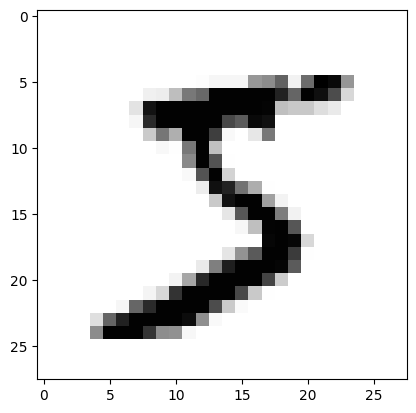

In [99]:
# 한 개의 이미지 확인
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

# imshow() 함수를 통해 이미지를 출력 가능하며 매우 많이 사용됨

In [100]:
# 이미지의 픽셀값 구조 확인
import sys

for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write("\n")

# 각 픽셀은 밝기에 따라 0~255까지의 값을 가짐 --> 긴 행렬로 이루어진 하나의 집합으로 변환
# 이미지는 이렇게 숫자의 집합(넘파이 배열)으로 바뀌어 학습 세트로 사용됨
# 28 x 28 = 784(총 픽셀 개수)개의 속성을 이용해 0~9 클래스 열 개 중 하나를 맞히는 문제임

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [101]:
# 데이터를 1차원 배열로 변환
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255
# reshape(총 샘플 수, 1차원 속(픽셀)성의 개수)
# 기존의 데이터는 가로 28, 세로 28의 2차원 배열이었음 --> 784개의 1차원 배열


# 데이터 정규화
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
# astype() 함수는 데이터 타입을 변환시켜줌
# 0~255 사이의 값으로 이루어진 픽셀 값을 0~1 사이의 값으로 변환 (for 케라스 성능)

# 클래스 값 확인
print("class : %d " % (y_train[0]))

# 원-핫 인코딩(바이너리화 과정) 적용
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# np_tuils.to_categorical() 함수는 원-핫 인코딩을 적용해줌
# to_categorical(클래스, 클래스의 개수) 형식으로 지정

# 0번째 샘플의 레이블(클래스(타깃값)) 확인
print(y_train[0])
# imshow() 함수를 통해 확인했을 때 숫자 이미지가 대략 5였음
# 생성된 벡터에서 인덱스 5의 값이 1인 것은 숫자 5를 나타냄

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 딥러닝 기본 프레임 만들기

In [102]:
# 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 구조 확인
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# 모델 최적화 설정(조기 종료)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

modelpath = "./MIST_MLP.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [104]:
# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25,
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback,checkpointer])

# 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1])) # [1]은 모델의 정확도(accuracy)


Epoch 1: val_loss improved from inf to 0.18452, saving model to ./MIST_MLP.keras

Epoch 2: val_loss improved from 0.18452 to 0.13947, saving model to ./MIST_MLP.keras

Epoch 3: val_loss improved from 0.13947 to 0.11180, saving model to ./MIST_MLP.keras

Epoch 4: val_loss improved from 0.11180 to 0.10152, saving model to ./MIST_MLP.keras

Epoch 5: val_loss improved from 0.10152 to 0.09211, saving model to ./MIST_MLP.keras

Epoch 6: val_loss improved from 0.09211 to 0.08939, saving model to ./MIST_MLP.keras

Epoch 7: val_loss improved from 0.08939 to 0.08847, saving model to ./MIST_MLP.keras

Epoch 8: val_loss improved from 0.08847 to 0.08452, saving model to ./MIST_MLP.keras

Epoch 9: val_loss improved from 0.08452 to 0.08241, saving model to ./MIST_MLP.keras

Epoch 10: val_loss did not improve from 0.08241

Epoch 11: val_loss did not improve from 0.08241

Epoch 12: val_loss improved from 0.08241 to 0.08152, saving model to ./MIST_MLP.keras

Epoch 13: val_loss did not improve from 0.08

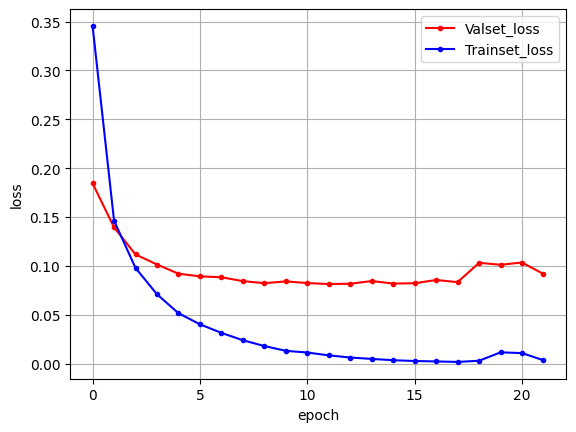

In [105]:
# 손실 그래프 시각화


# 검증 세트와 학습 세트의 손실 지정
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 생성
import numpy as np
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c="red", label='Valset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 20번째 에포크에서 조기 종료되었으며 10번째 에포크가 베스트 모델임 (정확도 98%)

# 합성곱(컨볼루션) 신경망(CNN)

* 합성곱 신경망은 입력 이미지에서 다시 한 번 특징을 추출하기 위해 **커널**을 도입하는 기법이다. (하나의 층으로 간주)

* 쉽게 말해 이미지의 배열에 도장을 한 칸씩 찍어가며 각각의 픽셀값에 가중치를 곱하는 것이다.

* 찍은 도장 한 칸당 가중치 합을 계산하고
<br> 그 계산 값을 스탬프를 찍은 횟수마다 배정하면 새로운 도장,
<br>즉 컨볼루션 층이 만들어진다.

* 새롭게 만들어진 이 도장을 **특징 맵(feature map)**이라 부른다.

* 케라스의 **Conv2D()** 함수는 컨볼루션 층을 추가해 준다.

* **하이퍼파라미터**는 사용자(user)가 자의적으로 지정하는 매개변수 값이다.

In [107]:
# 데이터셋 로드 및 전처리
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# CNN 모델 생성 (새로운 모델이므로 model2로 명명)
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D

model2 = Sequential()

# 3 x 3 크기의 도장(커널) 32개를 28 x 28 크기의 흑백(컬러면 값이 3) 이미지에 찍음
model2.add(Conv2D(32, kernel_size=(3, 3),
                  input_shape=(28, 28, 1), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
# 64개의 도장을 또 찍음 (도장의 개수는 하이퍼 파라미터임)

# 풀링, 드롭아웃, 플래튼

* **풀링**은 연산 과정의 효율을 위해 입력 특성 맵의 배열의 크기를 줄이는 것이다. (하나의 층으로 간주)

* 쉽게 말해 한 번 찍은 도장으로 얻은 특성 맵의 특성 맵을 다시 생성하는 것이다.

* 풀링을 적용하면 **풀링 창(윈도우)**의 크기만큼 구역을 나눈 다음,
<br> 구역의 최대 원소 값만 추출한다.

* 일반적으로 2 x 2 크기의 **맥스 풀링(max pooling)**을 진행하며,
<br> **스트라이드(stride)**는 배열 값과 동일하게 적용한다.

* 스트라이드란 쉽게 말해 도장을 찍을 때 이동하는 간격(보폭)이다.


* 노드가 많아지거나 층이 많아진다고 해서 학습이 무조건 좋아지는 게 아니다.

* **드롭아웃(drop out)** 기법이란 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것이다. (하나의 층으로 간주)

* 이렇게 하면 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지할 수 있다.

* **플래튼(Flatten)**은 이미지 배열을 1차원 배열로 변환시켜 주는 것이다.

* (컨볼루션 층이나 맥스 풀링은 입력 이미지를 2차원 배열인 채로 다룬다.)

* 플래튼은 하나의 층으로서 플래튼 층으로 칭하며,
<br> CNN에서 추출한 고차원 특성 맵을 1차원 구조인
<br> **완전 연결 계층**(이전 계층의 모든 뉴런과 연결)에
<br> 입력(연결)하기 위해 진행하는 것이다.

In [108]:
# 풀링 층 추가
model2.add(MaxPooling2D(pool_size=(2,2)))
# 스트라이드 매개변수를 지정하지 않으면 풀링 창(윈도우)의 크기와 동일하게 적용됨

# 드롭아웃 층 추가
model2.add(Dropout(0.25))
# 25% 노드를 끄겠다는 의미

# 풀링 층 추가
model2.add(Flatten())

# 컨볼루션 신경망 실행하기

In [111]:
# 모델 층 추가
model2.add(Dense(128,  activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

# 모델 컴파일(실행 옵션 설정)
model2.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# 모델 조기 종료 설정
modelpath="./data/model/MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습 실행
history = model2.fit(X_train, y_train, validation_split=0.25,
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model2.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.12112, saving model to ./data/model/MNIST_CNN.keras

Epoch 2: val_loss improved from 0.12112 to 0.07190, saving model to ./data/model/MNIST_CNN.keras

Epoch 3: val_loss did not improve from 0.07190

Epoch 4: val_loss improved from 0.07190 to 0.07001, saving model to ./data/model/MNIST_CNN.keras

Epoch 5: val_loss improved from 0.07001 to 0.06787, saving model to ./data/model/MNIST_CNN.keras

Epoch 6: val_loss improved from 0.06787 to 0.06083, saving model to ./data/model/MNIST_CNN.keras

Epoch 7: val_loss did not improve from 0.06083

Epoch 8: val_loss did not improve from 0.06083

Epoch 9: val_loss did not improve from 0.06083

Epoch 10: val_loss did not improve from 0.06083

Epoch 11: val_loss did not improve from 0.06083

Epoch 12: val_loss improved from 0.06083 to 0.05882, saving model to ./data/model/MNIST_CNN.keras

Epoch 13: val_loss improved from 0.05882 to 0.05701, saving model to ./data/model/MNIST_CNN.keras

Epoch 14: val_loss did no

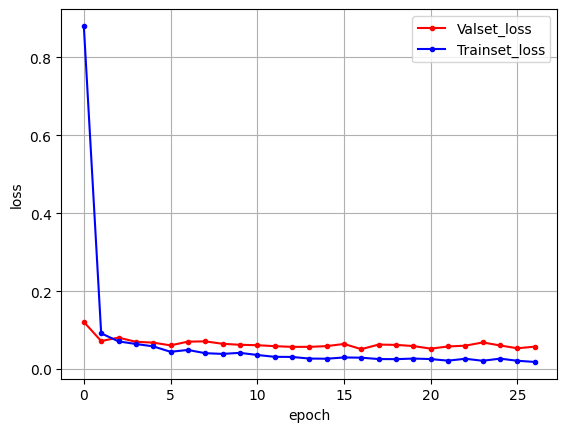

In [112]:
# 검증 및 훈련 세트 손실 그래프 시각화.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 생성
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c="red", label='Valset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 17번째 에포크에서 최적의 모델을 만들었고 27번째 에포크에서 학습이 중단됨
# 테스트 정확도는 99.21%로 향상되었다!
# CNN 모델이 얕은 구조의 손실(오차)이 딥러닝 모델보다 현저히 낮아짐